# Skaters (Season 2024/25) - Points

###  Import libraries

In [1]:
import sys
import os
import pandas as pd

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
from utils import data_cleaning
from utils import distribution_analysis as da
from utils import discrete_distribution_models as ddm
from utils import correlation_analysis
from utils import hypothesis_testing
from utils import regression_analysis

### Import the dataset

In [4]:
#skaters_df = "https://moneypuck.com/moneypuck/playerData/seasonSummary/2024/regular/skaters.csv"
skaters_df = "../data/skaters.csv"
df = pd.read_csv(skaters_df)
df.head(5)

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478047,2024,Michael Bunting,NSH,L,other,76,2237.0,37.0,26.19,...,7.28,10.09,72.0,87.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8478047,2024,Michael Bunting,NSH,L,all,76,70819.0,1474.0,43.70,...,161.54,187.75,3221.0,3522.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
3,8478047,2024,Michael Bunting,NSH,L,4on5,76,6.0,2.0,2.58,...,0.20,0.17,4.0,11.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478047,2024,Michael Bunting,NSH,L,5on4,76,8763.0,141.0,36.88,...,23.81,2.60,311.0,54.0,0.00,0.01,0.0,1.0,0.0,1.0


### Read the data

In [5]:
data_cleaning.print_df_size(df)

Number of samples: 4600
Number of features: 154


In [6]:
data_cleaning.save_column_names(df)

Saved: names_columns.txt


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 5.4+ MB


### Data cleaning

In [8]:
# Missing values?
data_cleaning.report_nan(df)

No missing values found.


In [9]:
df = data_cleaning.drop_duplicate_columns(df, ["faceoffsWon", "I_F_faceOffsWon"])
df = data_cleaning.drop_duplicate_columns(df, [ "penalityMinutes", "I_F_penalityMinutes"])

Dropped columns: ['I_F_faceOffsWon']
Number of features: 153
Dropped columns: ['I_F_penalityMinutes']
Number of features: 152


### Variables and Filter

In [10]:
situation = "all"
feature = "I_F_points"
min_games_played = 20
name_player="Auston Matthews"

In [11]:
df_points = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]

### Summary Statistics

In [12]:
feature="I_F_points"

answer = df[df["situation"] == "all"].loc[lambda d: d[feature].idxmax()]
print(f"Top point scorer: {answer["name"]} with {int(answer[feature])} points.")

answer = df[df["situation"] == "5on4"].loc[lambda d: d[feature].idxmax()]
print(f"Top point scorer in 5-on-4 situations: {answer["name"]} with {int(answer[feature])} points.")

answer = df[df["situation"] == "4on5"].loc[lambda d: d[feature].idxmax()]
print(f"Top point scorer in 4-on-5 situations: {answer["name"]} with {int(answer[feature])} points.")

Top point scorer: Nikita Kucherov with 121 points.
Top point scorer in 5-on-4 situations: Nikita Kucherov with 39 points.
Top point scorer in 4-on-5 situations: Alex Tuch with 8 points.


### Frequency Tables

Mean: 29.961
Variance: 508.011
Standard deviation: 22.523
Mode: [7. 8.]


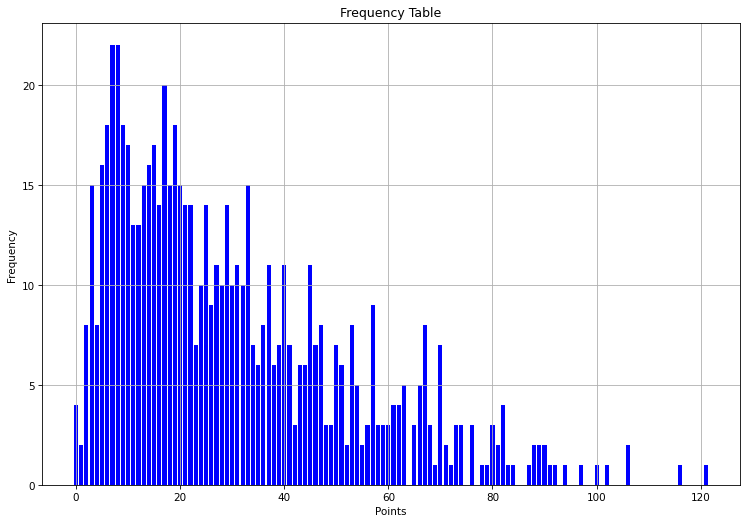

In [13]:
da.plot_ftab(df_points, feature, xlabel="Points")

Cohen's effect size: 0.61


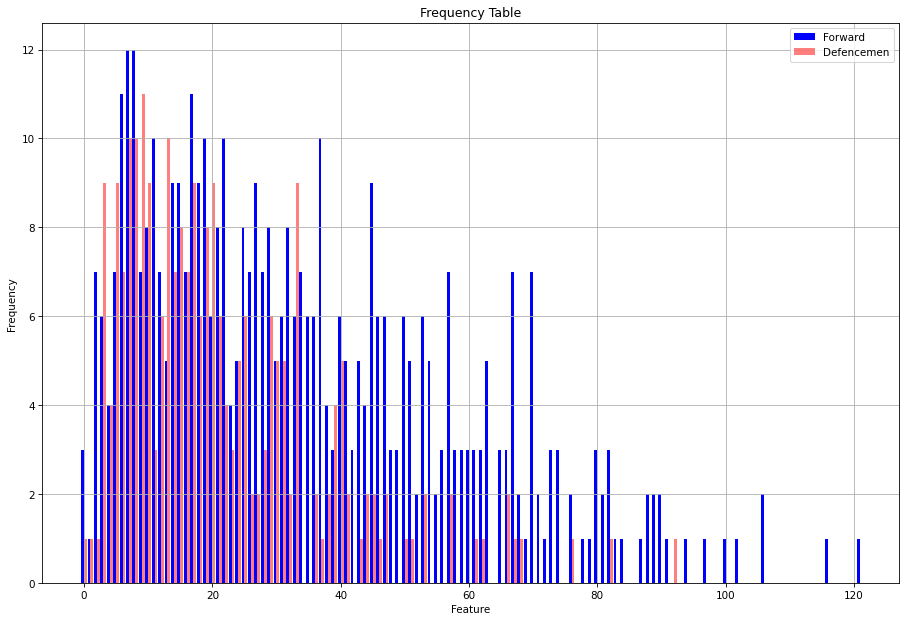

In [14]:
df1 = df_points[df_points["position"]!="D"]
df2 = df_points[df_points["position"]=="D"]

da.plot_two_ftabs(df1, df2, feature, name1="Forward", name2="Defencemen")

### Probability Mass Functions

Actual PMF: 
Mean: 29.961
Variance: 507.28
Standard deviation: 22.523
Mode: 7.0
Skewness: 1.061

Observed PMF: 
Mean: 46.893
Variance: 625.37
Standard deviation: 25.007
Mode: 67.0
Skewness: 0.496


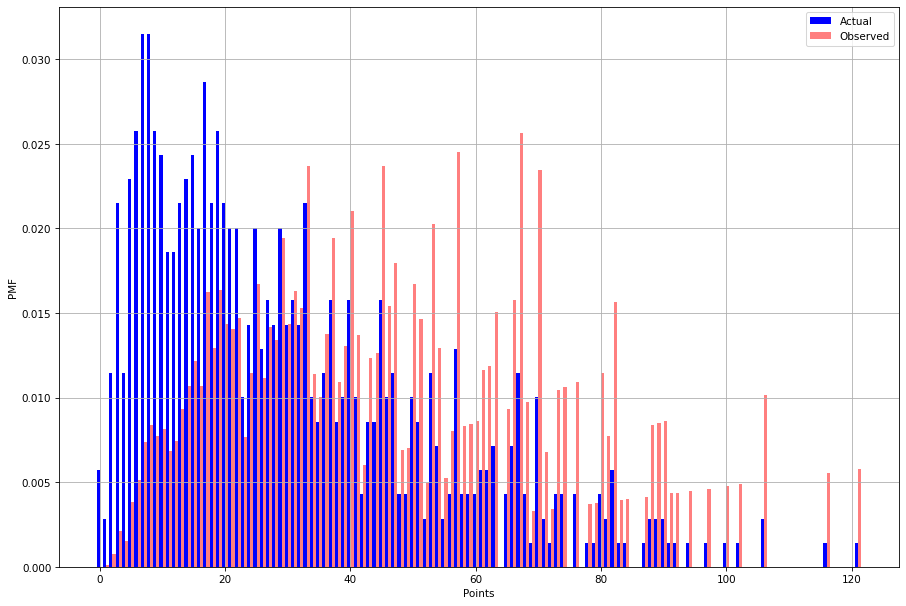

In [15]:
da.plot_pmf(df_points, feature, xlabel="Points", width=0.5)

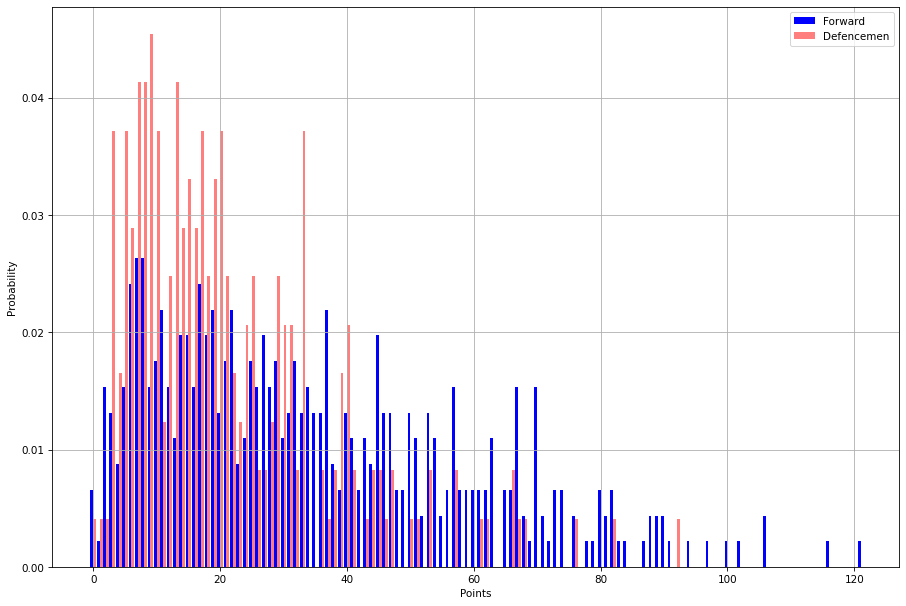

In [16]:
df1 = df_points[df_points["position"]!="D"]
df2 = df_points[df_points["position"]=="D"]

da.plot_two_pmfs(df1, df2, feature, name1="Forward", name2="Defencemen", xlabel="Points")

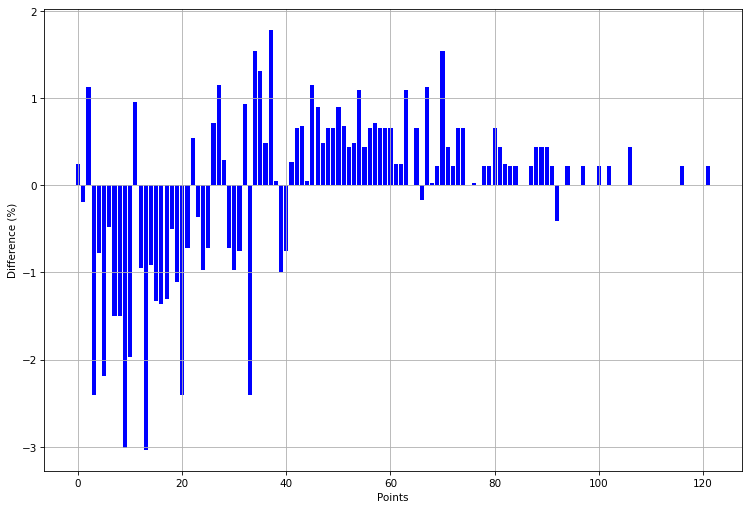

In [17]:
df1 = df_points[df_points["position"]!="D"]
df2 = df_points[df_points["position"]=="D"]

da.plot_diff_pmfs(df1, df2, feature, name1="Forward", name2="Defencemen", xlabel="Points")

### Cumulative Distribution Function

Auston Matthews - Percentile rank: 95.85
Median: 24.00
Interquartile range: 31.00
Quartile skewness: 0.23


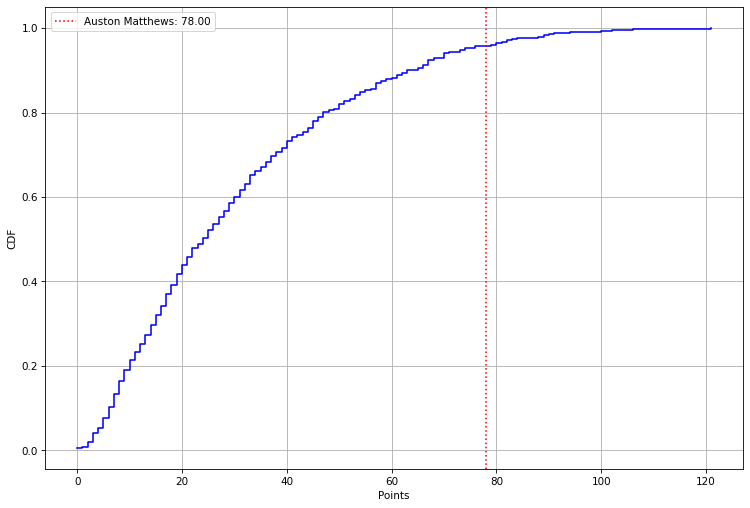

In [18]:
vals = df_points[feature].values
ref = df_points[df_points["name"]==name_player][feature].values[0]

da.print_percentile_rank(ref, vals, label=name_player)
da.plot_cdf(ref, vals, label=name_player, xlabel="Points")

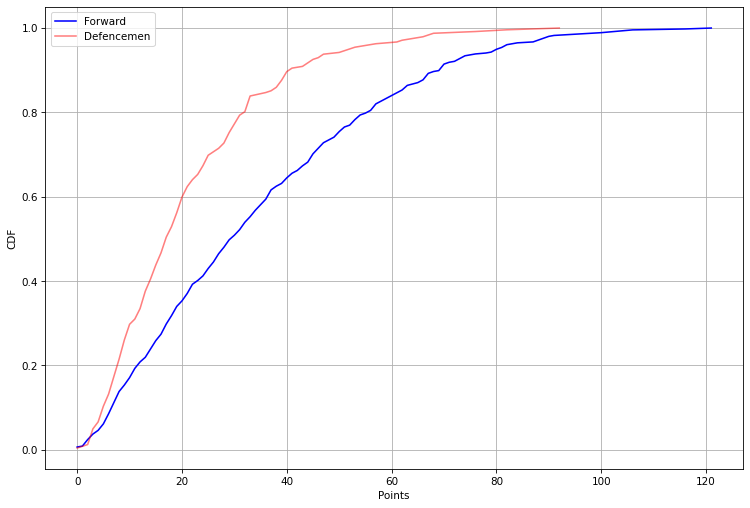

In [19]:
vals1 = df_points[df_points["position"]!="D"][feature].values
vals2 = df_points[df_points["position"]=="D"][feature].values

da.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Points")

### Modeling Distributions

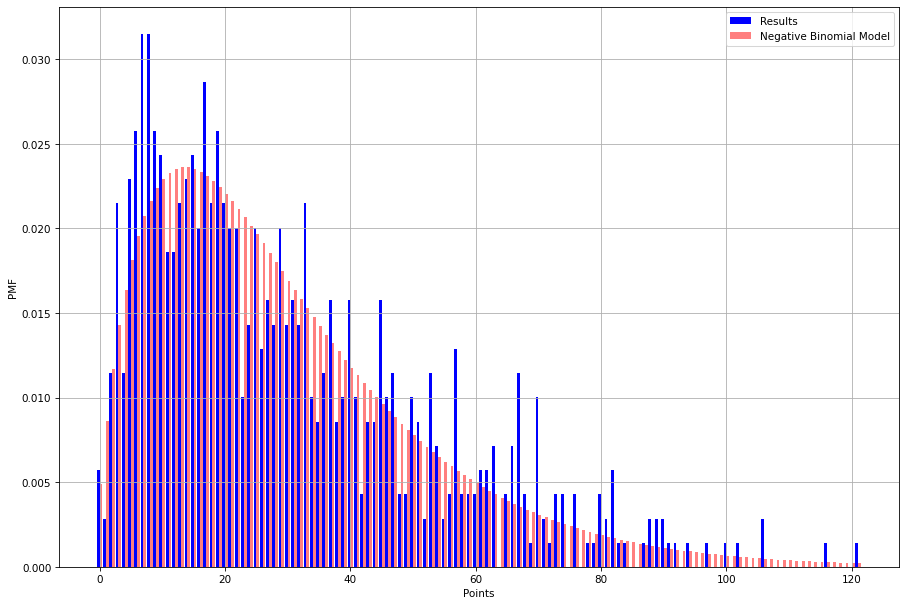

In [20]:
top_score = int(df_points[feature].max())

mean, var, r = ddm.plot_empirical_vs_nb_model(df_points, feature, range(top_score+1), xlabel="Points")

### Estimation

Mean Squared Error (Mean): 0.0142
Mean Absolute Error (Mean): 0.0611
Mean Squared Error (Median): 0.1342
Mean Absolute Error (Median): 0.1771


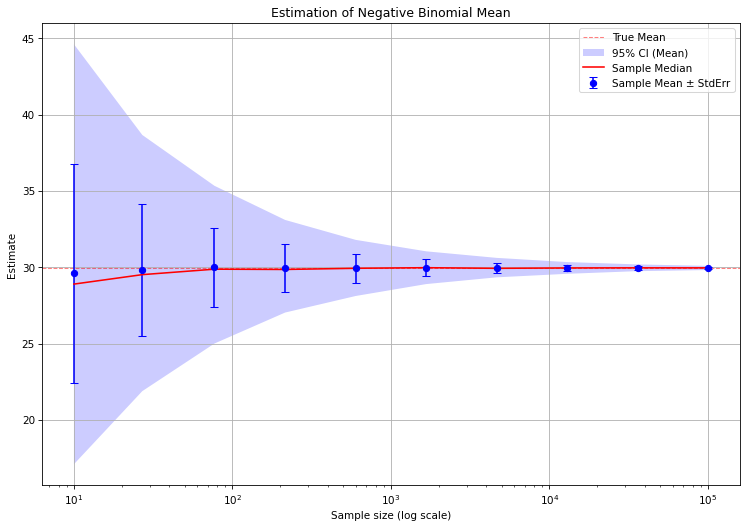

In [21]:
ddm.simulate_mean_estimation_nb(mean, r)

## Part 02 - Relationships between 2 variables

### Variables and Filter

In [22]:
feature1="I_F_shotAttempts"
feature2="I_F_points"
situation = "all"
min_games_played = 20
label1 = "Shot attempts"
label2= "Points"

In [23]:
df_goals = df[(df["situation"]==situation) & (df["games_played"]>=min_games_played)]
df1 = df_goals[feature1]
df2 = df_goals[feature2]

### Scatter plot

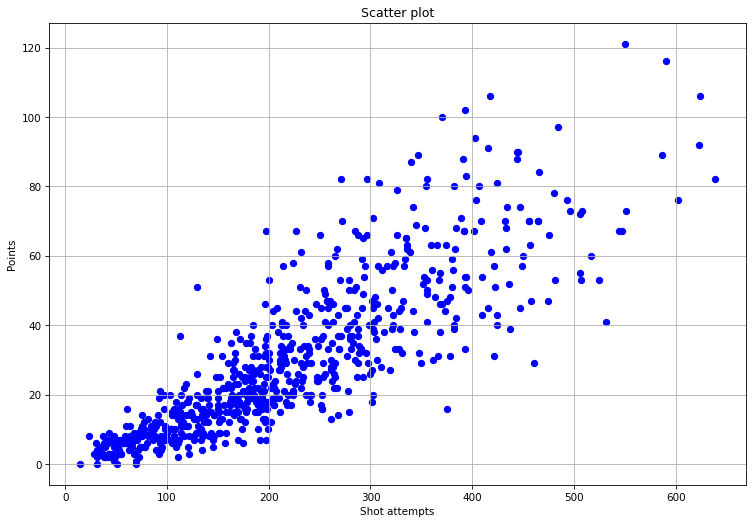

In [24]:
correlation_analysis.plot_scatter(df1, df2, xlabel=label1, ylabel=label2)

### Decile plot

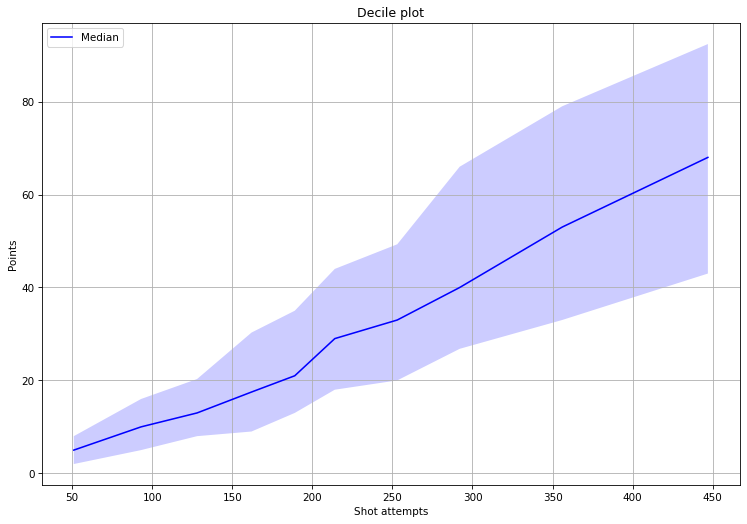

In [25]:
correlation_analysis.plot_decile(df_goals, feature1, feature2, xlabel=label1, ylabel=label2)

### Standardization and Pearson Correlation Coefficient 

Pearson correlation coefficient: 0.852


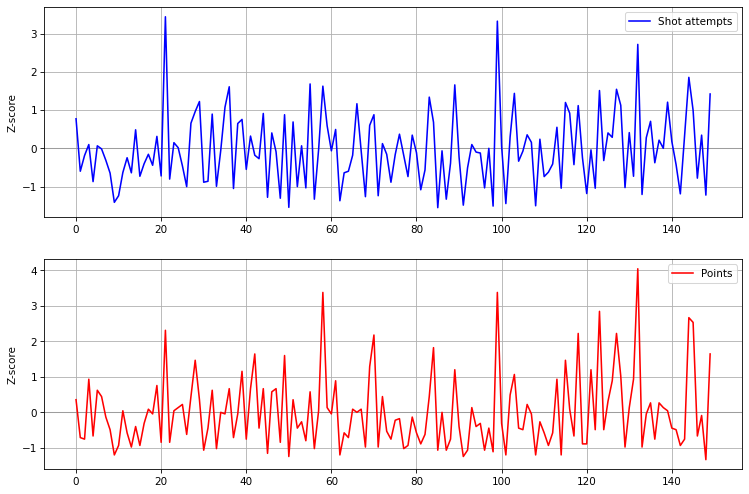

In [26]:
correlation_analysis.plot_zscore_and_corr(df1, df2, 
                                          end_sample=150, 
                                          label1=label1, 
                                          label2=label2)

### Rank Correlation and Spearman's Rank Correlation Coefficient

Spearman's rank correlation coefficient: 0.891


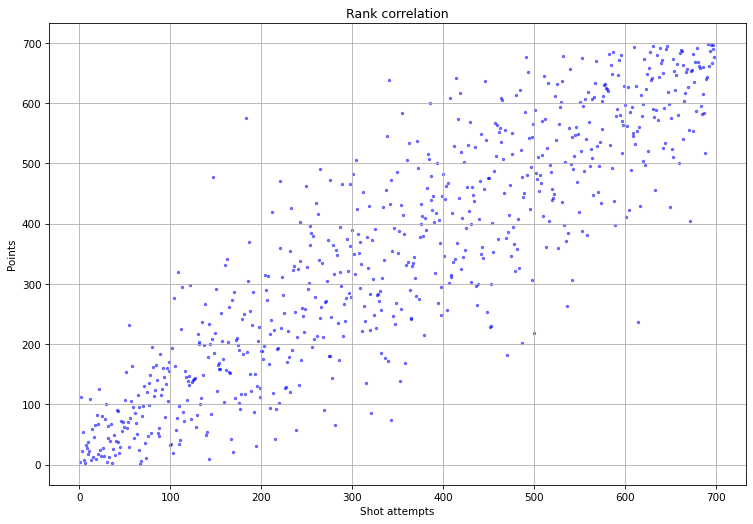

In [27]:
correlation_analysis.plot_rank_correlation(df1, df2, xlabel=label1, ylabel=label2)

### Least Squares Fit

                            OLS Regression Results                            
Dep. Variable:             I_F_points   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     1845.
Date:                Mon, 11 Aug 2025   Prob (F-statistic):          6.89e-198
Time:                        15:08:01   Log-Likelihood:                -2712.4
No. Observations:                 698   AIC:                             5429.
Df Residuals:                     696   BIC:                             5438.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.5844      0.920  

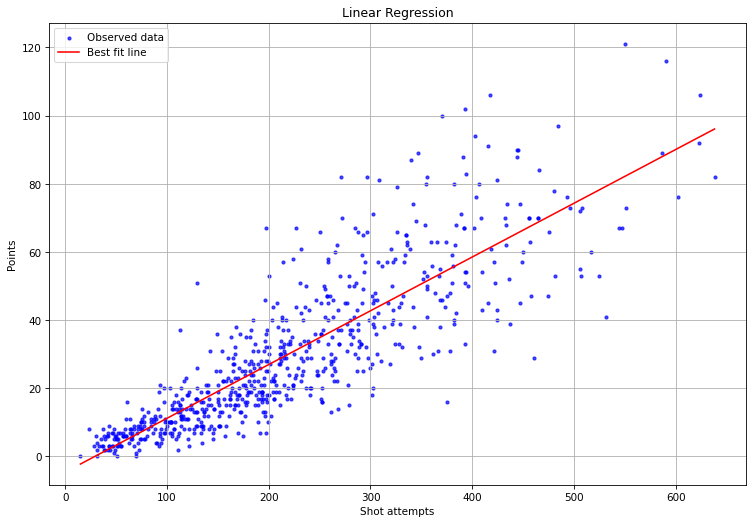

In [28]:
regression_analysis.plot_linear_regression(df_goals, feature1, feature2, xlabel=label1, ylabel=label2)

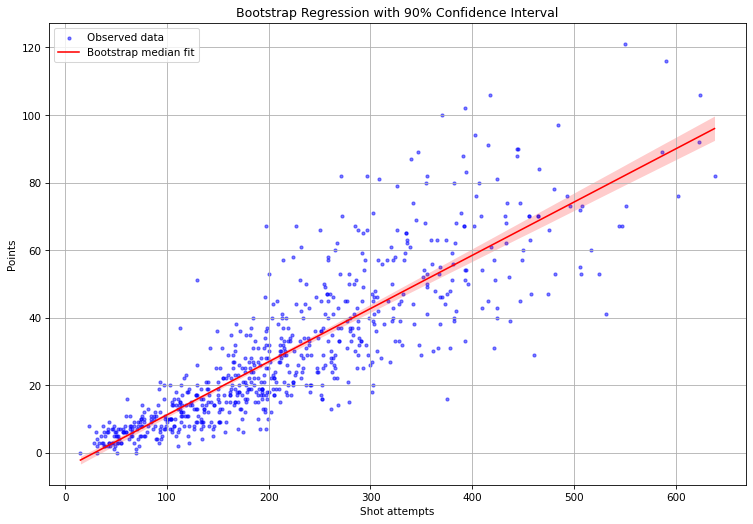

In [29]:
regression_analysis.plot_bootstrap_regression(df_goals, feature1, feature2, xlabel=label1, ylabel=label2)

## Part 03 - Relationships between multiple variables

In [30]:
situation = "all"
min_games_played = 20
target = "I_F_goals"
predictors = ["I_F_shotAttempts", "I_F_shotsOnGoal"]

df_goals = df[(df["situation"]==situation) & (df["games_played"]>=min_games_played)]

In [31]:
regression_analysis.multiple_regression(df_goals, target, predictors)

                            OLS Regression Results                            
Dep. Variable:              I_F_goals   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     1287.
Date:                Mon, 11 Aug 2025   Prob (F-statistic):          2.23e-234
Time:                        15:08:17   Log-Likelihood:                -2053.9
No. Observations:                 698   AIC:                             4114.
Df Residuals:                     695   BIC:                             4127.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.7344      0.359  